<a href="https://colab.research.google.com/github/joelcapistrano/cifar10-mlp/blob/master/CIFAR10_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi Layer Perceptron for CIFAR10**


In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

Load CIFAR10 dataset and prepare training/test sets

In [3]:
# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Get number of labels
num_labels = len(np.unique(y_train))

# Convert labels to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Get image dimension (image is assumed to be square)
image_size = x_train.shape[1]

# For MLP, the input dim is a vector, so we reshape
input_size = image_size * image_size * 3
x_train = np.reshape(x_train, [-1, input_size])
x_test = np.reshape(x_test, [-1, input_size])

# Normalize image values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

170500096/170498071 [==============================] - 6s 0us/step


Set network parameters that will be used by MLP

In [0]:
batch_size = 128
hidden_units = [256,128,64]

The MLP Architecture has **three Dense layers** with **ReLU** activation function added after each Dense layer. A function is set up to facilitate **hyperparameter tuning** (number of nodes per dense layer). **Categorical Crossentropy** is chosen as the loss function and **Accuracy** is chosen as the metric since the CNN will perform single label classification (i.e. only one label can be correct).

In [0]:
# MLP Architecture
# Dense-Dense-Dense-Dense-Activation
# Batch Size set to 128
# 20 Epochs for each training/tuning run
def run_model(hidden_units):
  model = Sequential()
  model.add(Dense(hidden_units[0], input_dim=input_size))
  model.add(Activation('relu'))
  model.add(Dense(hidden_units[1]))
  model.add(Activation('relu'))
  model.add(Dense(hidden_units[2]))
  model.add(Activation('relu'))
  model.add(Dense(num_labels))
  model.add(Activation('softmax'))
  model.summary()

  model.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

  model.fit(x_train, y_train, epochs=20, batch_size=128)
  train_score = model.evaluate(x_train, y_train, batch_size=128)
  print("\nTrain accuracy: %.1f%%" % (100.0 * train_score[1]))
  test_score = model.evaluate(x_test, y_test, batch_size=128)
  print("\nTest accuracy: %.1f%%" % (100.0 * test_score[1]))

In [15]:
# Set hidden units to 256-128-64
run_model([256,128,64])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               786688    
_________________________________________________________________
activation_16 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_17 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_18 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

With hidden units set to 256-128-64, Training Data Accuracy is 50.2% and Test Data Accuracy is 47.7%. Next step is to see if accuracy will improve as we change the hidden units' configuration.

In [16]:
# Set hidden units to 64-128-256
run_model([64,128,256])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                196672    
_________________________________________________________________
activation_20 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               8320      
_________________________________________________________________
activation_21 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               33024     
_________________________________________________________________
activation_22 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)               

With hidden units set to 64-128-256, Training Data Accuracy is 49.8% and Test Data Accuracy is 48.0%. Next step is to see if accuracy will improve as we change the hidden units' configuration.

In [17]:
# Set hidden units to 256-128-256
run_model([256,128,256])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               786688    
_________________________________________________________________
activation_24 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_25 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               33024     
_________________________________________________________________
activation_26 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)               

With hidden units set to 256-128-256, Training Data Accuracy is 50.6% and Test Data Accuracy is 48.2%. Next step is to see if accuracy will improve as we change the hidden units' configuration.

In [18]:
# Set hidden units to 256-128-256
run_model([128,256,128])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               393344    
_________________________________________________________________
activation_28 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               33024     
_________________________________________________________________
activation_29 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_30 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)               

With hidden units set to 128-256-128, Training Data Accuracy is 48.9% and Test Data Accuracy is 46.8%. Next step is to see if accuracy will improve as we change the hidden units' configuration.

In [19]:
# Set hidden units to 256-256-256
run_model([128,128,128])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 128)               393344    
_________________________________________________________________
activation_32 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_33 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_34 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)               

With hidden units set to 128-128-128, Training Data Accuracy is 50.8% and Test Data Accuracy is 48.4%. Next step is to see if accuracy will improve as we change the hidden units' configuration.

In [20]:
# Set hidden units to 256-256-256
run_model([256,256,256])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 256)               786688    
_________________________________________________________________
activation_36 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_37 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_38 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)               

With hidden units set to 256-256-256, Training Data Accuracy is 49.6% and Test Data Accuracy is 46.7%. Among the various configurations that were tested, the 128-128-128 configuration generated the highest Training Data Accuracy (50.8%) and Test Data Accuracy (48.4%). Thus, we use the 128-128-128 configuration for succeeding tests.

After hyperparameter tuning, we now train the MLP over **200 epochs**. For every 20th epoch, Training & Test Data Accuracies are generated for evaluation.

In [21]:
# Set chosen hyperparameter values
hidden_units = [128,128,128]

model = Sequential()
model.add(Dense(hidden_units[0], input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units[1]))
model.add(Activation('relu'))
model.add(Dense(hidden_units[2]))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
  
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Train the MLP
i = 1
epoch = 20
epoch_num = []
train_acc = []
test_acc = []
while i <= 10:
  epoch_num.append(epoch * i)
  model.fit(x_train, y_train, epochs=20, batch_size=128)
  train_score = model.evaluate(x_train, y_train, batch_size=128)
  print("\nTrain accuracy: %.1f%%" % (100.0 * train_score[1]))
  train_acc.append(train_score[1])
  test_score = model.evaluate(x_test, y_test, batch_size=128)
  print("\nTest accuracy: %.1f%%" % (100.0 * test_score[1]))
  test_acc.append(test_score[1])
  i = i + 1

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 128)               393344    
_________________________________________________________________
activation_40 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_41 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_42 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)              

The model's Training and Test Data Accuracy is plotted against the number of epochs performed during training. Looking at the plot, it can be observed that **as the number of epochs increase, Training Data Accuracy increases**. On the other hand, **Test Data Accuracy gradually decreases after 80 epochs**, indicating **model overfitting**.

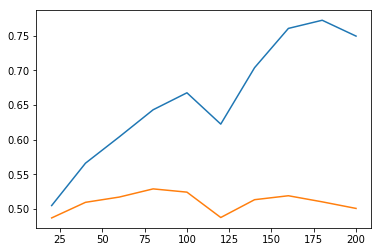

In [22]:
# Generate plot showing Training & Test Data Accuracy
plt.plot(epoch_num, train_acc)
plt.plot(epoch_num, test_acc)
plt.show()

In [23]:
# Generate table showing Training & Test Data Accuracy
df = pd.DataFrame(pd.concat([pd.Series(epoch_num),pd.Series(train_acc),pd.Series(test_acc)], axis=1))
df.columns = ['Epoch','Training Data Accuracy','Test Data Acccuracy']
df

,Epoch,Training Data Accuracy,Test Data Acccuracy
0,20,0.50484,0.4870
1,40,0.56600,0.5095
2,60,0.60400,0.5171
3,80,0.64308,0.5289
4,100,0.66758,0.5242
5,120,0.62240,0.4876
6,140,0.70384,0.5133
7,160,0.76052,0.5190
8,180,0.77230,0.5102
9,200,0.74940,0.5007


**MLP generated lower Test Data Accuracy than CNN (MLP @ 52.89%, CNN @ 78.57%)**. Since MLP's input is a one-dimensional vector (i.e. each pixel of the image is a feature), **model training is inefficient**. Multiple layers are needed before highly distinctive areas of the image can stand out. With only three layers, MLP pales in comparison to CNN when it comes to image data.